In [1]:
import tensorflow as tf

C:\Users\moham\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print(tf.__version__)

2.3.0


In [8]:

# In[1]:


import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


# In[2]:


fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']    
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))


(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


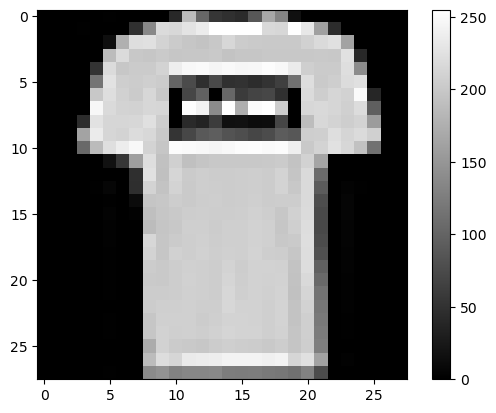

In [11]:


# In[3]:


plt.figure()
plt.imshow(train_images[1],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()


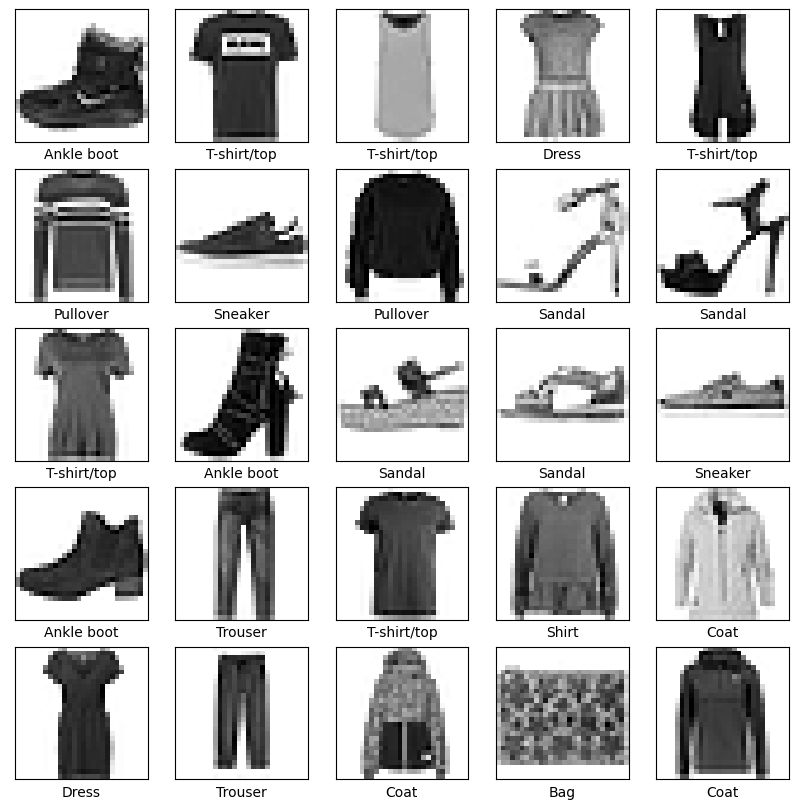

In [12]:
# In[4]:


train_images = train_images / 255.0
test_images = test_images / 255.0


# In[5]:


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



In [13]:

# In[6]:


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


# In[7]:


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # diff between actual and probabilities
              metrics=['accuracy'])


# In[8]:



In [18]:

# In[8]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model.fit(train_images, train_labels, epochs=500,callbacks=[callback]) # less epochs means UF , more epochs means OF



Epoch 1/500
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2571 - accuracy: 0.9040
Epoch 2/500
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2465 - accuracy: 0.9084
Epoch 3/500
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2395 - accuracy: 0.9101
Epoch 4/500
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2313 - accuracy: 0.9131
Epoch 5/500
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2244 - accuracy: 0.9151
Epoch 6/500
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2177 - accuracy: 0.9192
Epoch 7/500
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2100 - accuracy: 0.9214
Epoch 8/500
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2029 - accuracy: 0.9245
Epoch 9/500
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1985 - accuracy: 0.9254
Epoch 10/500
1875/1875 [==============================] - 3s 2ms/step - l

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0631 - accuracy: 0.9761
Epoch 80/500
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0593 - accuracy: 0.9779
Epoch 81/500
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0598 - accuracy: 0.9778
Epoch 82/500
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0609 - accuracy: 0.9769
Epoch 83/500
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0596 - accuracy: 0.9773


In [19]:

# In[9]:


test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 [==============================] - 0s 1ms/step - loss: 0.7866 - accuracy: 0.8828
Test accuracy: 0.8827999830245972


In [20]:
# In[10]:


predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])



[9.1073084e-35 3.8585597e-34 6.1877802e-34 0.0000000e+00 5.1710991e-38
 1.8176047e-10 4.3097264e-34 1.5096557e-09 5.3709800e-24 1.0000000e+00]
9
9


In [21]:

# In[11]:


def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)



# In[12]:


def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')




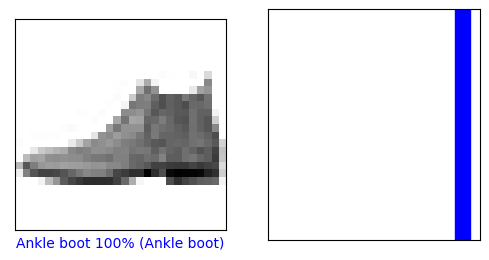

In [22]:
# In[13]:


i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()



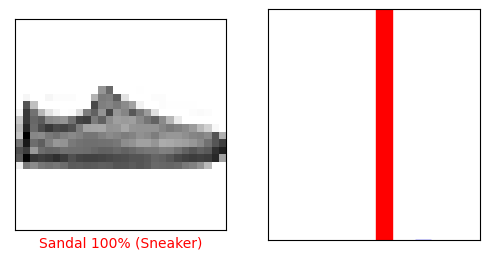

In [23]:
# In[14]:


i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()



In [24]:

# In[15]:


# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))




<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

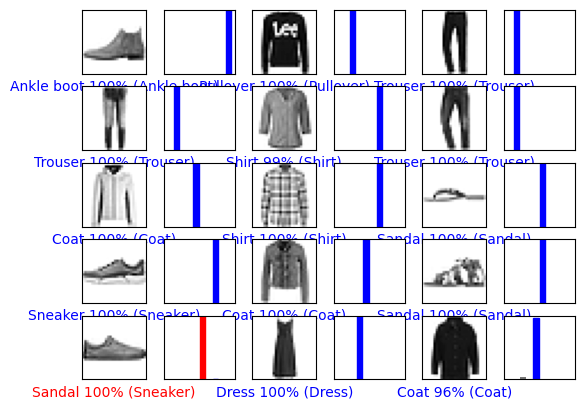

In [25]:
# In[16]:


for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()



In [26]:

# In[17]:


# Grab an image from the test dataset
img = test_images[0]

print(img.shape)


(28, 28)


In [27]:

# In[18]:


# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)



(1, 28, 28)


In [28]:


# In[19]:


predictions_single = model.predict(img)

print(predictions_single)


[[9.1072389e-35 3.8585010e-34 6.1876856e-34 0.0000000e+00 5.1709808e-38
  1.8175908e-10 4.3096608e-34 1.5096528e-09 5.3709804e-24 1.0000000e+00]]


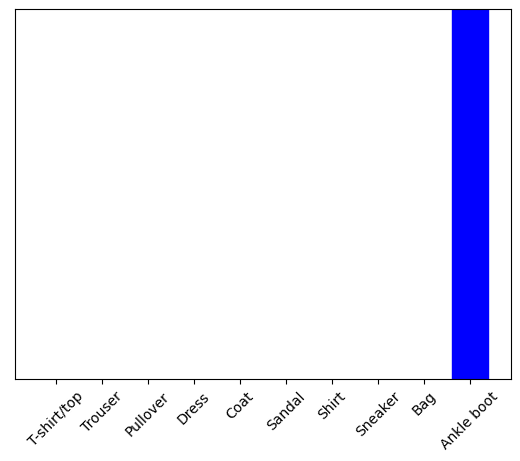

In [29]:
# In[20]:


plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()


In [30]:
# In[21]:


prediction_result = np.argmax(predictions_single[0])
print(prediction_result)





9
